In [730]:
import numpy as np
import matplotlib.pyplot as plt

In [731]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (10,8)


# criar o dataset

In [732]:
def get_linear_curve(x, w, b=0, noise_scale=0):
    return w * x + b +  noise_scale * np.random.randn(x.shape[0]);

In [733]:
x = np.arange(-10, 30.1, 0.5)
Y = get_linear_curve(x, 1.8, 32,  noise_scale=2.5)

In [734]:
x.shape[0],
Y.shape[0]

81

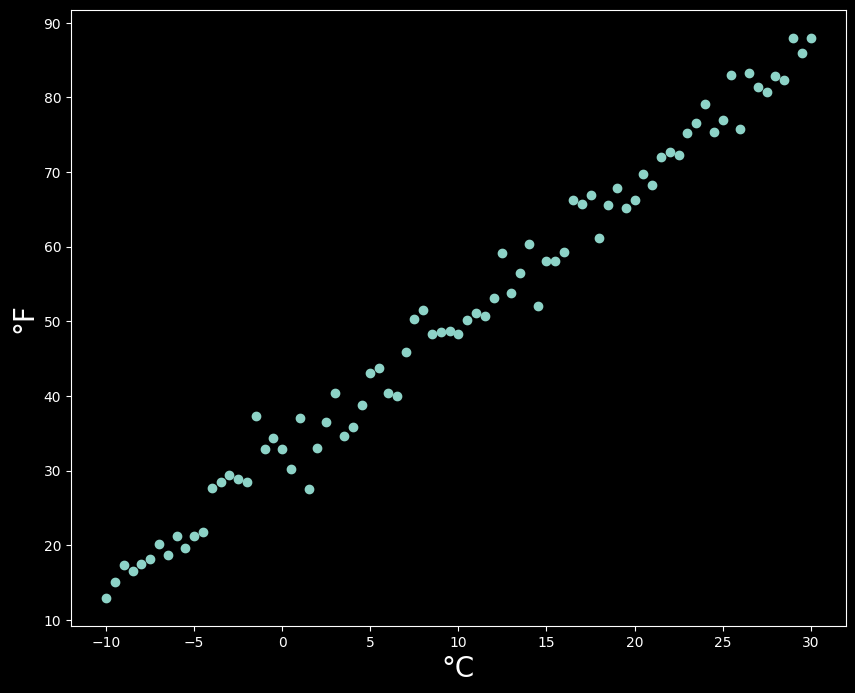

In [735]:
plt.scatter(x,Y);
plt.xlabel('°C', fontsize=20);
plt.ylabel('°F', fontsize=20);

 Modelo 

In [736]:
w = np.random.randn(1)
b = 0


In [737]:
def foward(inputs, w, b):
    return w * inputs + b


In [738]:
def mse(Y, y):
    return(Y -y)**2

In [739]:
def backpropagation(inputs, outputs, tagert, w, b, lr):
    dw = lr * (-2 * inputs *(tagert-outputs)).mean()
    db = lr * (-2 *(tagert-outputs)).mean()

    w -= dw
    b -= db
    return w, b

In [740]:
def model_fit(inputs, target, w, b, epochs = 200, lr = 0.001):

    for epoch in range(epochs):

        outputs = foward(inputs, w, b)
        loss = np.mean(mse(target, outputs))
        w, b = backpropagation(inputs, outputs, target, w, b, lr)


        if (epoch + 1) % (epochs/10) == 0:
         print(f'Epoch: [{(epoch+1)}/{epochs}] Loss:[{loss: .4f}]')

    return w, b

    

In [741]:
x = np.arange(-10,30,2)
Y = get_linear_curve(x, w = 1.8, b=32)

In [742]:
#Inicialização do peso

w = np.random.randn(1)
b = np.zeros(1)

In [743]:
w, b = model_fit(x, Y, w, b, epochs=500, lr=0.001)
print(f'w: {w[0]: .3f}, b: {b[0]: .3f}')


Epoch: [50/500] Loss:[ 558.1059]
Epoch: [100/500] Loss:[ 492.9426]
Epoch: [150/500] Loss:[ 435.3876]
Epoch: [200/500] Loss:[ 384.5527]
Epoch: [250/500] Loss:[ 339.6531]
Epoch: [300/500] Loss:[ 299.9959]
Epoch: [350/500] Loss:[ 264.9690]
Epoch: [400/500] Loss:[ 234.0317]
Epoch: [450/500] Loss:[ 206.7067]
Epoch: [500/500] Loss:[ 182.5720]
w:  2.522, b:  14.882


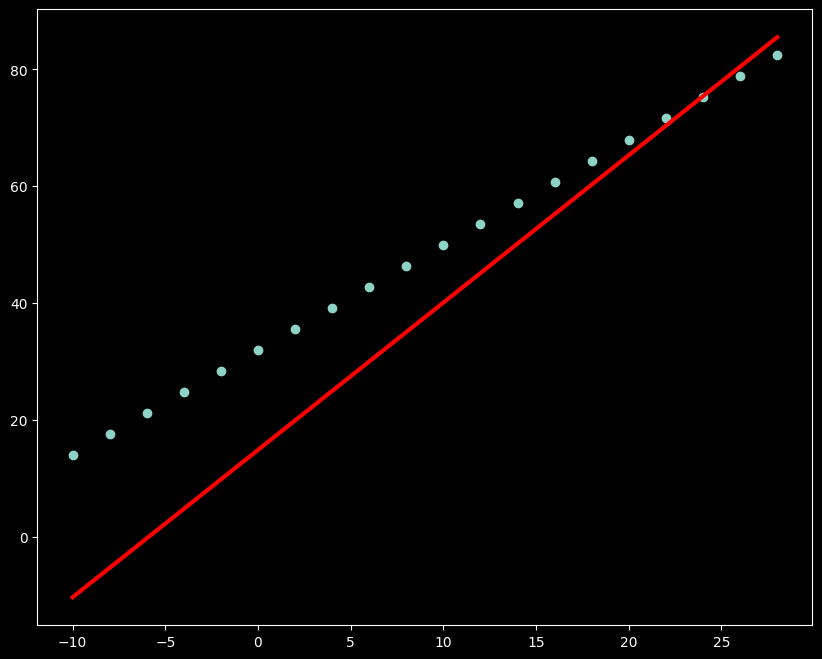

In [744]:
plt.scatter(x, Y)
plt.plot(x, get_linear_curve(x, w, b),  'r', lw=3)